## Import all the necessary libraries

In [1]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 71.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading the dataset
import pandas as pd
# Pipelines for Data preprocessing and data cleaning
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Balancing dataset 
from imblearn.over_sampling import SMOTE
# train test split
from sklearn.model_selection import train_test_split
# build the model that can detect anamolies in the data
from sklearn.ensemble import IsolationForest

In [3]:
df = pd.read_csv('/kaggle/input/fraud-detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Check if the dataset is balanced or not

In [7]:
df["Class"].unique()

array([0, 1])

In [8]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

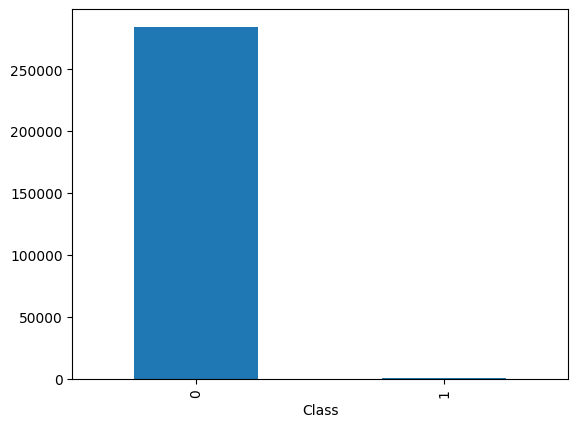

In [9]:
df["Class"].value_counts().plot(kind="bar")

## This dataset is imbalanced dataset. The number of records for class1 is way too less than number of records for class0.

## Separate X and Y features

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
x = df.drop(columns=["Time","Class"])
y = df[["Class"]]

## Data Preprocessing and Data cleaning

In [12]:
pre = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [13]:
xpre = pre.fit_transform(x)
xpre.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


## Split the dataset into training and testing

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(xpre,y,train_size=0.8,random_state=21)

## Imbalanced datasets can be handled by SMOTE (Synthetic Minority Oversampling Technique)
SMOTE is a ML technique which creates synthetic samples for minority classes(minority class refers to the class which has very few datapoints/records)

In [15]:
smote = SMOTE(sampling_strategy='minority')
x_resampled,y_resampled = smote.fit_resample(xtrain,ytrain)

In [16]:
y_resampled.value_counts()

Class
0        227462
1        227462
Name: count, dtype: int64

## Using Isolation Forest model to identify the anamolies in the data

In [17]:
x_resampled[0:1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.408354,0.287952,0.623848,0.254627,0.615316,-0.016815,0.764763,-0.099449,-0.121015,-0.620955,...,-0.129596,-0.287292,-0.416113,0.585648,-0.950443,-1.147339,-2.210942,0.050745,-0.178736,-0.063768


In [18]:
import numpy as np
colors = np.random.rand(29)

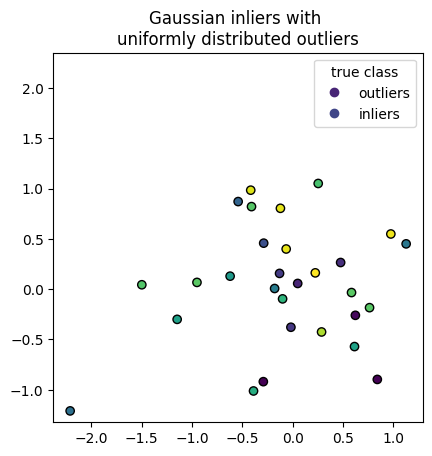

In [19]:
import matplotlib.pyplot as plt

scatter = plt.scatter(x_resampled[0:1], x_resampled[1:2],c=colors, edgecolor="k")
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(handles=handles, labels=["outliers", "inliers"], title="true class")
plt.title("Gaussian inliers with \nuniformly distributed outliers")
plt.show()

In [20]:
model = IsolationForest(n_estimators=100,contamination='auto',random_state=21)
model.fit(x_resampled)

IsolationForest(random_state=21)

In [21]:
anomaly = model.predict(x_resampled)
anomaly

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
# Calculate anomaly scores and classify anomalies
data = x_resampled.loc[x_resampled.index].copy()
data['anomaly_score'] = model.decision_function(x_resampled)
data['anomaly'] = model.predict(x_resampled)

data['anomaly'].value_counts()

anomaly
 1    397325
-1     57599
Name: count, dtype: int64

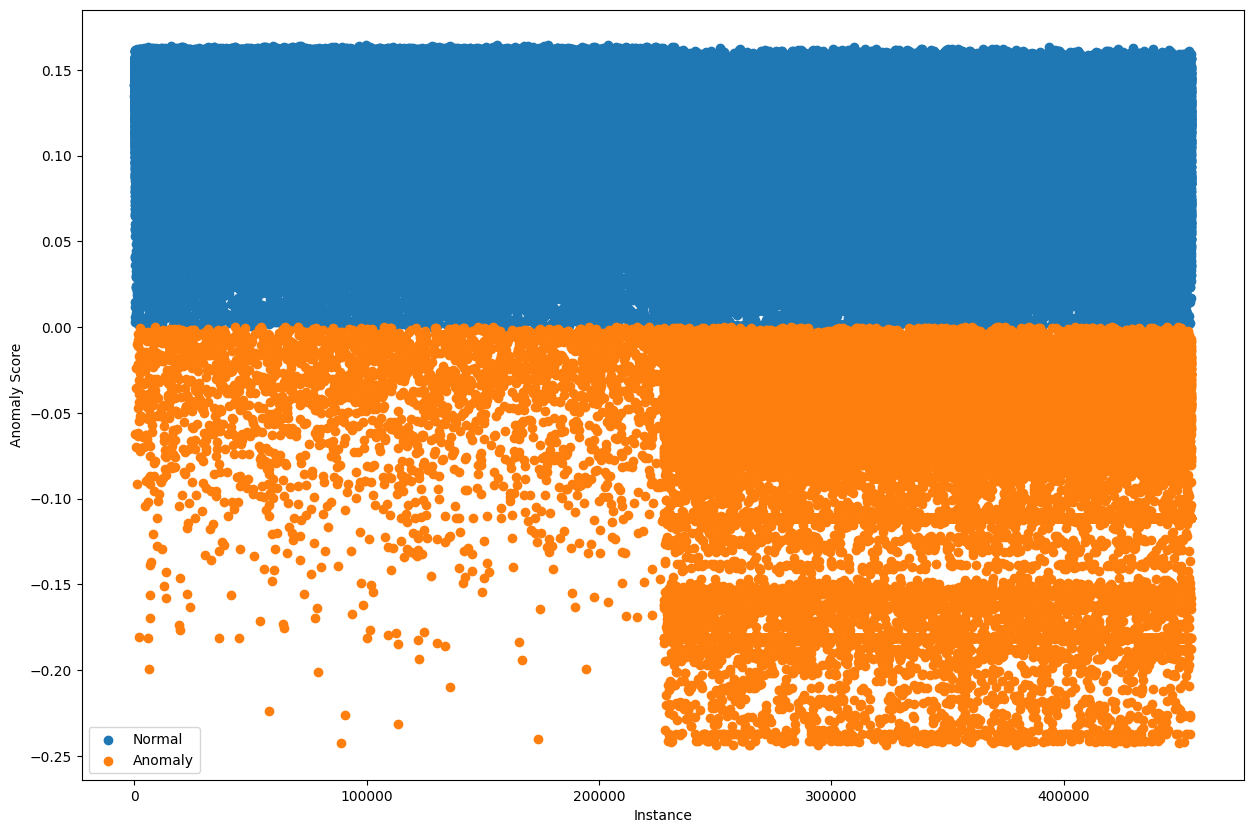

In [23]:
#Visualize the plots
# Visualization of the results
plt.figure(figsize=(15, 10))

# Plot normal instances
normal = data[data['anomaly'] == 1]
plt.scatter(normal.index, normal['anomaly_score'], label='Normal')

# Plot anomalies
anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['anomaly_score'], label='Anomaly')
plt.xlabel("Instance")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()

In [24]:
#Anomalies in data are:
df_anomaly = data[data["anomaly"]==-1]
df_anomaly

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,anomaly_score,anomaly
103,-6.949422,-11.731067,1.240840,1.579799,11.778916,-7.152570,-9.247014,1.741822,0.258669,0.826857,...,-2.079140,6.198109,-2.956447,2.122588,-0.876023,-1.683389,1.212591,0.802777,-0.062231,-1
491,-4.000822,-5.136441,-0.081591,0.604348,3.627702,-2.453916,-0.412422,-0.630330,1.467345,-0.052268,...,1.548527,8.087676,-1.601836,4.107403,-0.377069,0.965128,2.260512,-0.307611,-0.035517,-1
550,-1.912532,-6.422161,-2.543072,1.246159,-2.946792,0.229765,2.645872,-0.826419,-0.297341,-0.736643,...,-2.869768,-3.661114,0.198894,-3.004384,-1.866026,-1.395208,1.486193,11.913739,-0.070104,-1
728,-3.306850,1.064416,-0.791436,-2.766591,-2.034761,1.777056,-2.936699,-3.897443,1.106081,-0.285172,...,-1.600656,1.478557,-1.675309,-0.999566,-0.480188,-4.502280,1.560970,0.046579,-0.023970,-1
902,-3.464460,2.693417,-3.592999,-0.155197,2.857764,-2.111068,-11.366286,-11.152741,-0.844798,-0.831845,...,3.275372,-13.586742,0.193177,-7.180368,0.702197,0.564766,1.793287,-0.345233,-0.091282,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454903,-6.096299,4.334180,-12.407022,5.578192,-7.955039,-3.538219,-11.354059,6.537602,-3.680115,-14.159931,...,0.550290,-1.413067,0.693488,-0.018670,-0.035995,-4.903886,-1.761705,0.015842,-0.045034,-1
454907,-12.045942,9.534873,-17.858849,7.241461,-12.051905,-0.269331,-24.136316,-9.746615,-8.421234,-19.113506,...,4.686420,2.571783,0.379267,-1.784013,-1.128837,-14.730493,-3.148889,-0.347081,-0.161510,-1
454910,-6.735448,7.742946,-6.533642,2.345092,-3.478497,4.323496,-15.157238,-31.275101,-0.356389,-4.640228,...,-12.246126,8.493120,-1.055790,0.504920,-0.225780,3.145358,2.845976,-0.349231,-0.111519,-1
454911,-7.018236,3.879436,-9.329490,4.303773,-9.169186,-2.304177,-12.299148,7.470029,-5.359457,-13.179856,...,0.963126,-0.373287,1.236138,0.192422,-0.788508,-3.606802,-2.110946,-0.280627,-0.052905,-1


In [25]:
df_anomaly.to_csv("Anomaly Files.csv",index=False)